## PROJECT NLP

Change directory (when I put the python object which I'm going to use)

In [2]:
cd nlp_project/

/home/lucads/nlp_project


## Import the class I've created (sa) and other useful packages

In [3]:
import sentiment_analysis as sa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import string

I instantiate the methods of the class I need for the purpose of the project

This object will get several things (such us home timeline) that belongs to Twitter

In [4]:
twitter_client = sa.TwitterClient()

This object will create a df with all the stuff I'm interested in

In [5]:
tweet_analyzer = sa.TweetAnalyzer()

And this represents the api which will allows me to get the tweets

In [6]:
api = twitter_client.get_twitter_client_api()

I create a list of the brands I want to extract the tweets from

In [7]:
brands = ['Gucci', 'Prada', 'Dior', 'HugoBoss', 'Versace', 'Ralphlauren', 'DolceGabbana', 'Coach', 'GiorgioArmani', 'Fendi', 'MarcJacobs', 'Burberry', 'Chanel', 'Zara']

Let me try to scrape some data. I want to get the last 201 tweets from each brand. This trial involve just the first of the list.

In [8]:
tweets = api.user_timeline('gucci', count = 201)
df2=tweet_analyzer.tweets_to_data_frame(tweets)

In [9]:
df2.head()

,tweets,id,len,date,name,source,likes,retweets
0,I copy therefore I am. Every human practice be...,1050757631839756288,129,2018-10-12 14:38:36,gucci,Hootsuite Inc.,349,45
1,"DA BANG, who performed at the opening of #TheA...",1050744206485069824,135,2018-10-12 13:45:15,gucci,Twitter Web Client,187,13
2,Actress #SongZuer in a leather dress from #Guc...,1050506591496212487,130,2018-10-11 22:01:03,gucci,Hootsuite Inc.,214,25
3,"Attending the opening of #TheArtistIsPresent, ...",1050438452620288000,140,2018-10-11 17:30:17,gucci,Hootsuite Inc.,190,14
4,#SakaguchiKentaro in #GucciCruise19 with a swe...,1050385268799356929,140,2018-10-11 13:58:57,gucci,Twitter Web Client,324,71


Cool, it worked

## Create the df

Now I want to create the dataframe which contain all the dataframes for each brand

In [10]:
dfs = []
for brand in brands:
    tweets = api.user_timeline(brand, count = 201)
    df=tweet_analyzer.tweets_to_data_frame(tweets)
    dfs.append(df)

In [11]:
df_brands = pd.concat(dfs)

Let's have a look at the last rows

In [12]:
df_brands.tail()

,tweets,id,len,date,name,source,likes,retweets
195,"@ShangarMeman Hi Shangar, be kindly advised th...",1049400390784040960,140,2018-10-08 20:45:24,ZARA,Salesforce - Social Studio,0,0
196,"@HayleyM70 Hi Hayley, we apologise for this. K...",1049346066099912704,103,2018-10-08 17:09:32,ZARA,Salesforce - Social Studio,0,0
197,"@MissCB09 Hi Carli, we apologise for the incon...",1049335216379183110,140,2018-10-08 16:26:25,ZARA,Salesforce - Social Studio,0,0
198,"@itsSoso007 Hi, we are sorry to hear of your d...",1049332439590604800,139,2018-10-08 16:15:23,ZARA,Salesforce - Social Studio,0,0
199,"@AComplains Hi, we can confirm that we have re...",1049328291063189505,76,2018-10-08 15:58:54,ZARA,Salesforce - Social Studio,0,0


I want to set the date column as the index

In [13]:
df_brands.set_index('date', drop = True, inplace=True)

In [14]:
df_brands.tail()

,tweets,id,len,name,source,likes,retweets
date,,,,,,,
2018-10-08 20:45:24,"@ShangarMeman Hi Shangar, be kindly advised th...",1049400390784040960,140,ZARA,Salesforce - Social Studio,0,0
2018-10-08 17:09:32,"@HayleyM70 Hi Hayley, we apologise for this. K...",1049346066099912704,103,ZARA,Salesforce - Social Studio,0,0
2018-10-08 16:26:25,"@MissCB09 Hi Carli, we apologise for the incon...",1049335216379183110,140,ZARA,Salesforce - Social Studio,0,0
2018-10-08 16:15:23,"@itsSoso007 Hi, we are sorry to hear of your d...",1049332439590604800,139,ZARA,Salesforce - Social Studio,0,0
2018-10-08 15:58:54,"@AComplains Hi, we can confirm that we have re...",1049328291063189505,76,ZARA,Salesforce - Social Studio,0,0


Let's see some summary statistics

In [15]:
df_brands.groupby('name').mean().sort_values('likes', ascending = False)

,id,len,likes,retweets
name,,,,
CHANEL,1.027054e+18,134.570,1607.615,431.620
gucci,1.044141e+18,136.055,1493.380,570.245
VERSACE,1.036924e+18,135.125,963.465,197.525
Dolce & Gabbana,1.041750e+18,118.800,944.805,217.610
Dior,1.023488e+18,139.060,891.170,214.680
Ralph Lauren,1.020677e+18,131.705,611.840,116.065
Coach,1.033458e+18,123.565,533.260,234.845
Burberry,1.036614e+18,127.025,330.285,57.040
Fendi,1.033009e+18,128.365,283.250,93.210


### Some Plot

Let's plot some series about likes and retweets for each brand

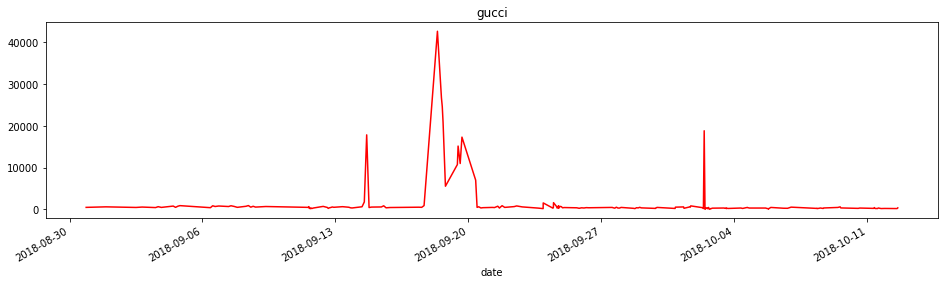

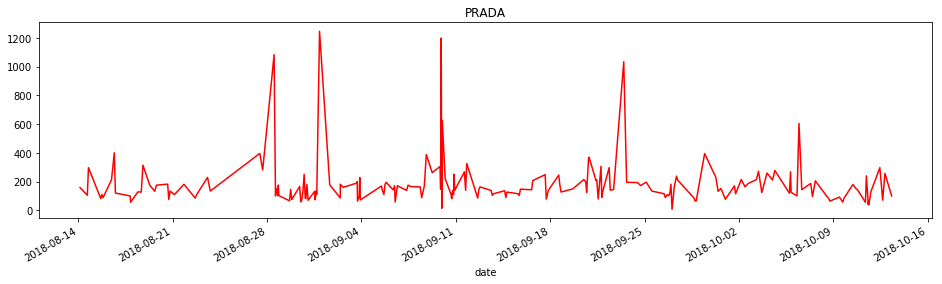

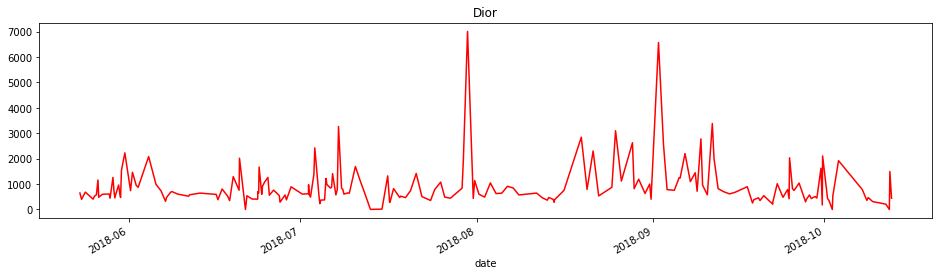

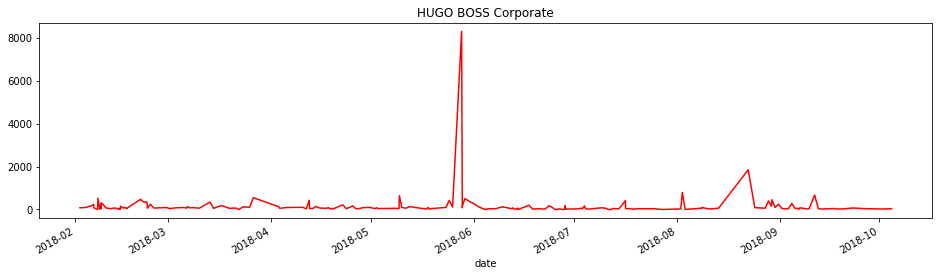

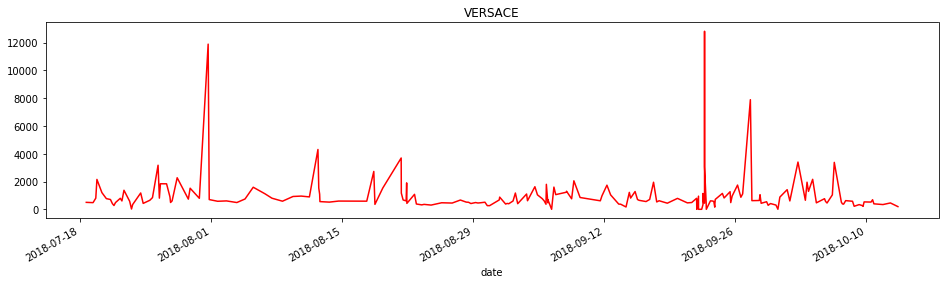

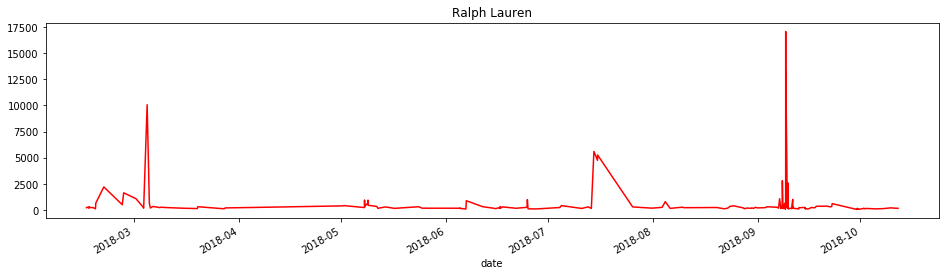

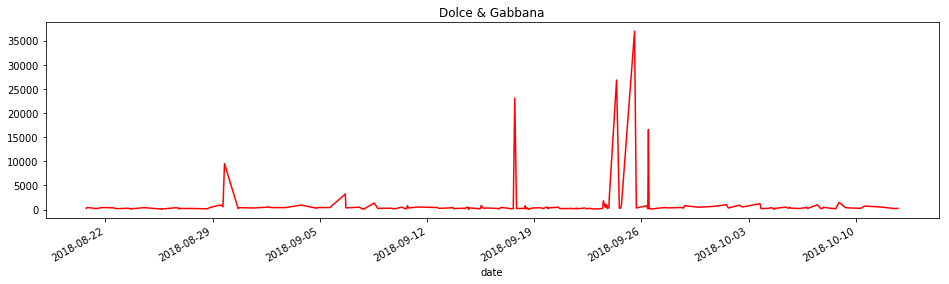

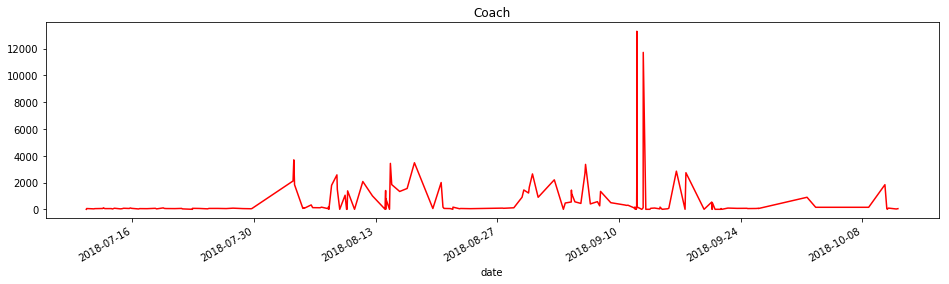

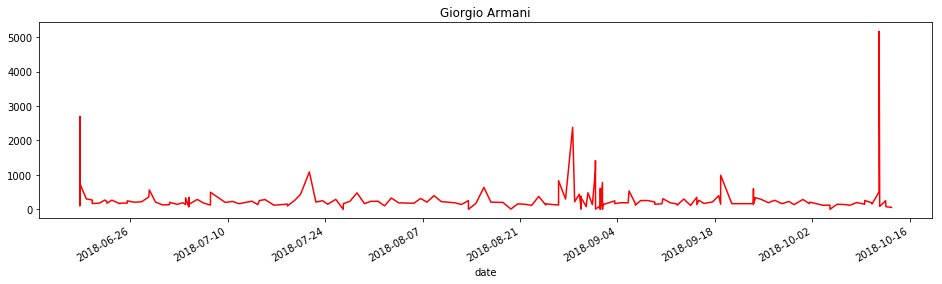

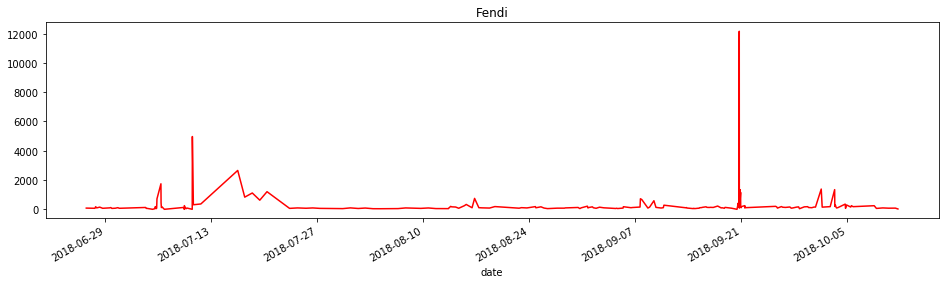

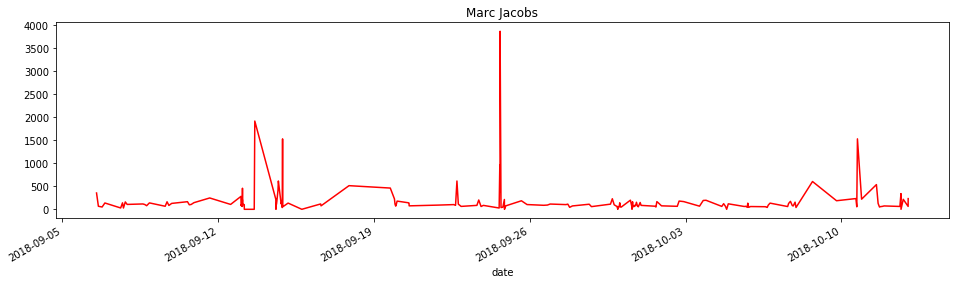

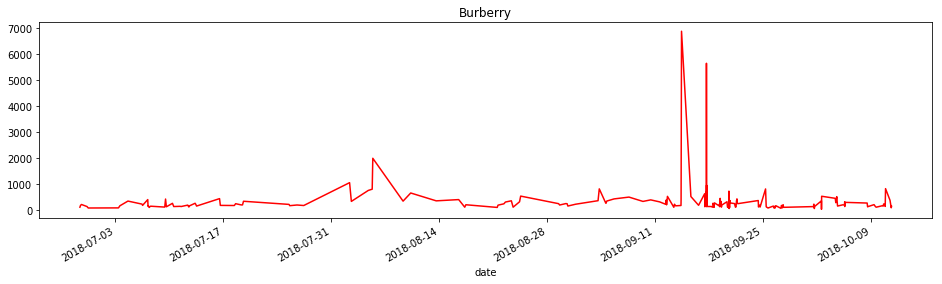

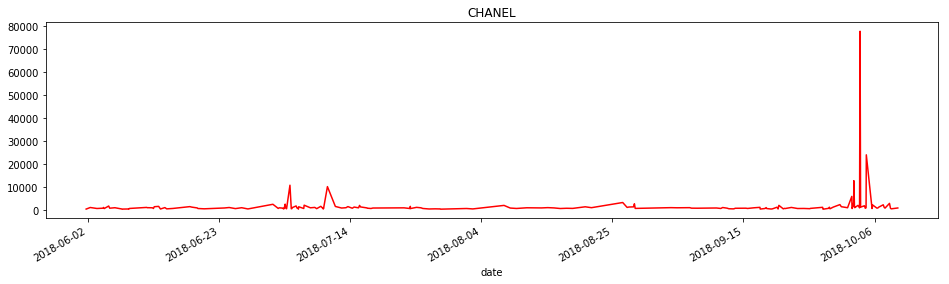

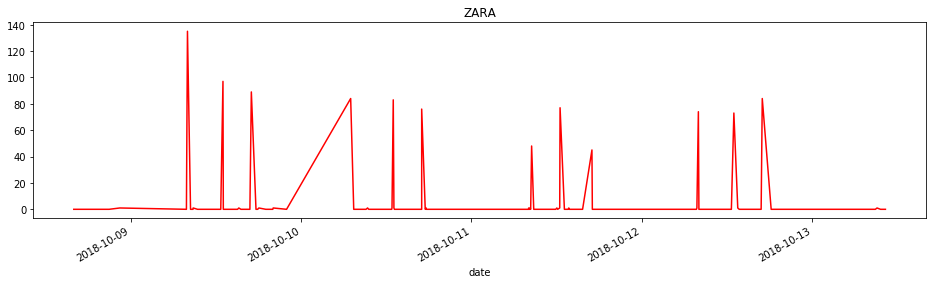

In [16]:
for brand in df_brands.name.unique():    
    time_favs = pd.Series(data=df_brands[df_brands.name == brand]['likes'].values, index=df_brands[df_brands.name == brand].index)
    time_favs.plot(figsize=(16, 4), color='r')
    plt.title(brand)
    plt.show()

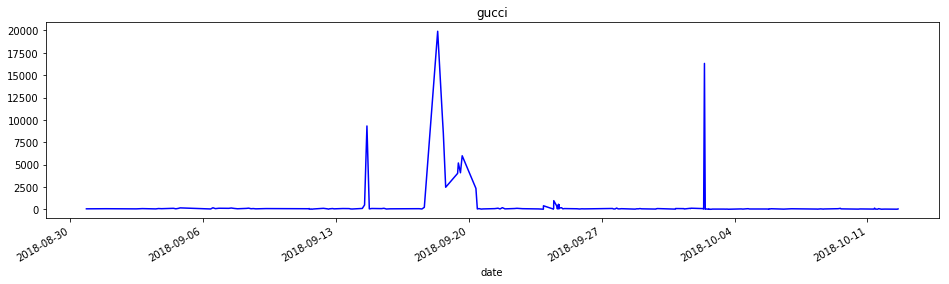

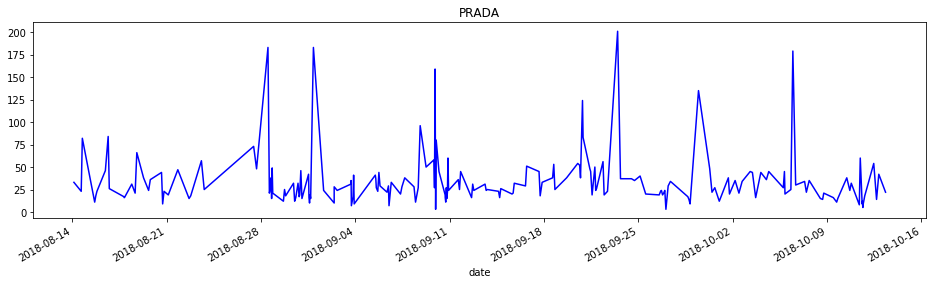

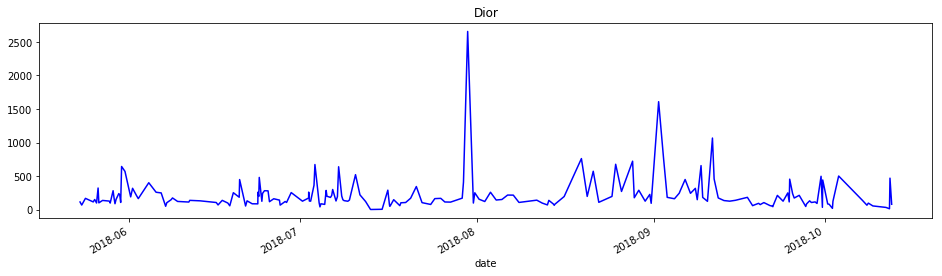

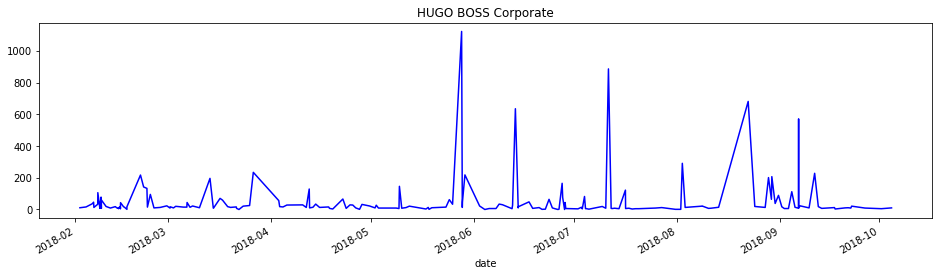

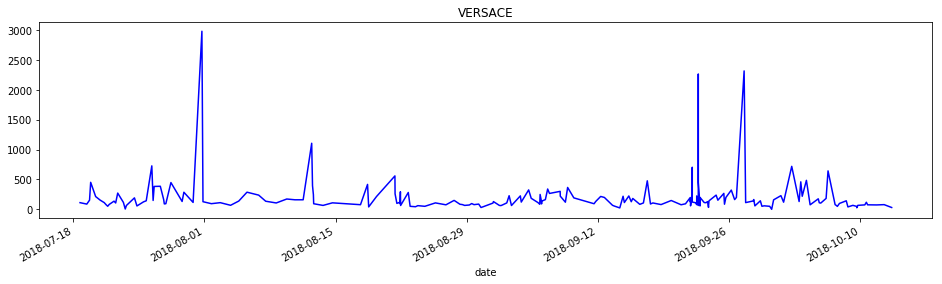

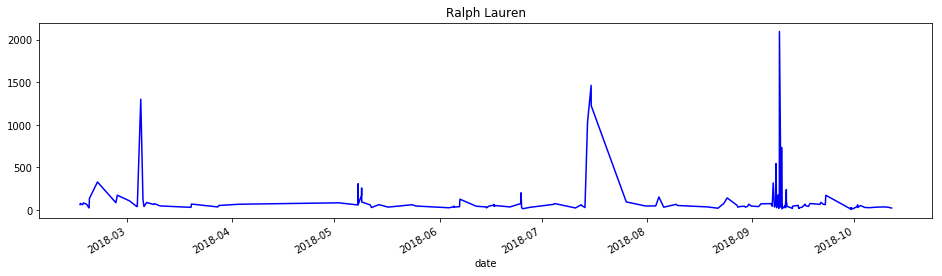

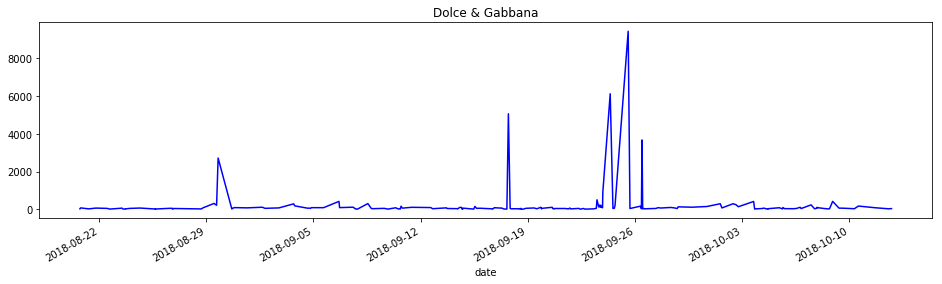

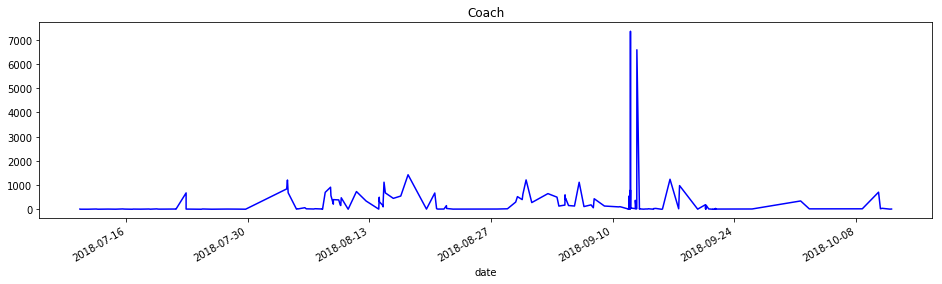

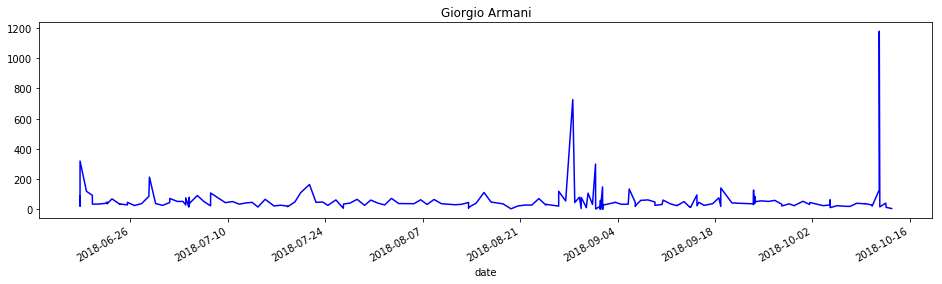

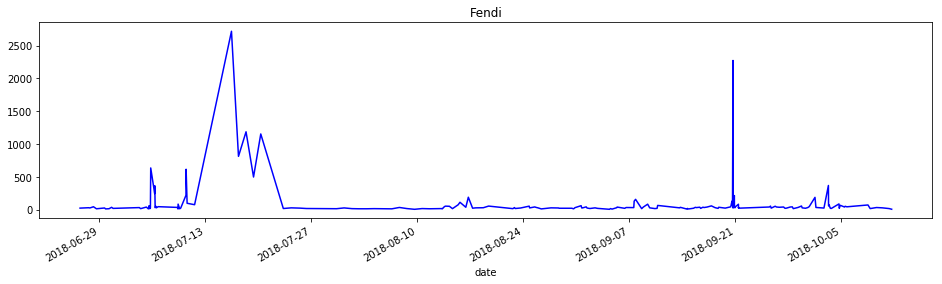

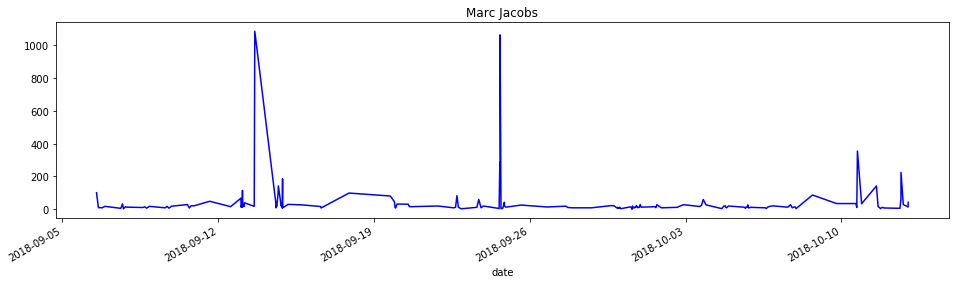

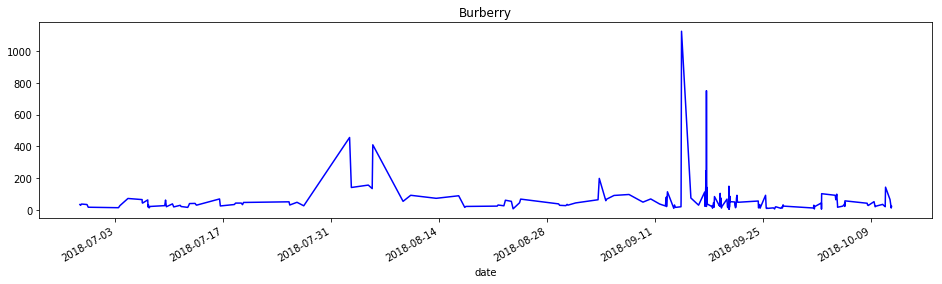

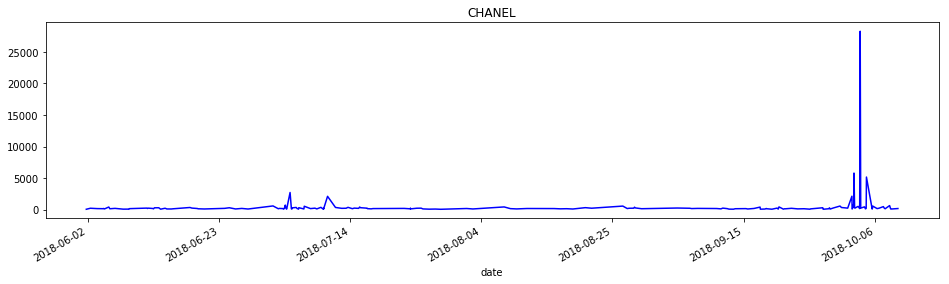

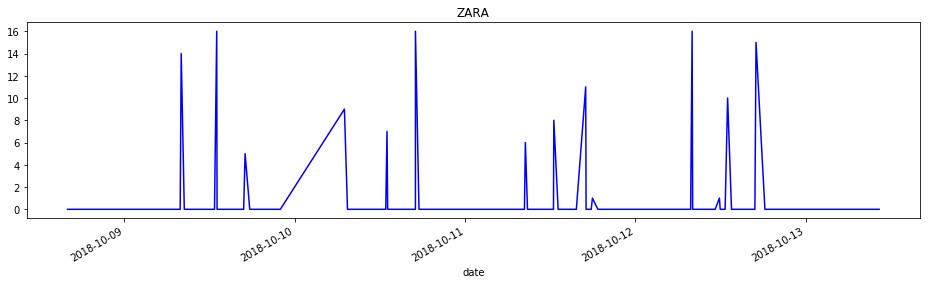

In [17]:
for brand in df_brands.name.unique():    
    time_retweets = pd.Series(data=df_brands[df_brands.name == brand]['retweets'].values, index=df_brands[df_brands.name == brand].index)
    time_retweets.plot(figsize=(16, 4), color='b')
    plt.title(brand)
    plt.show()

## Text cleaning

Now I want to perform some text cleaning. I'm going to be doing so by creating some functions

This function will remove punctuation

In [18]:
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

df_brands['tweets_clean'] = df_brands['tweets'].apply(lambda x: remove_punct(x))

This function will split the text in tokens. I need regex in order to do so

In [19]:
import re

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

df_brands['tweets_tokenized'] = df_brands['tweets_clean'].apply(lambda x: tokenize(x.lower()))

Also, I need nltk package for cleaning the text as I need the stopwords to be removed

In [20]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')

In [21]:
def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

df_brands['tweets_nostop'] = df_brands['tweets'].apply(lambda x: clean_text(x.lower()))


In [22]:
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /home/lucads/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


The last step is to create a function which allows us to lemmatize the words.

In [23]:
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text
df_brands['tweets_lemmatized'] = df_brands['tweets_nostop'].apply(lambda x: lemmatizing(x))

Let's what we got

Now create the corpus

In [24]:
corpus = []
for t in df_brands['tweets_lemmatized']:
    corpus.append(t)

In [25]:
corpus = sum(corpus, []) # trick to unlist nested list

### Remove https (links)

There are some tokens which needs to be removed. They all start with http (links)

In [26]:
re.match("^http", corpus[9])

We use the filter function in order to remove all the tokens with http

In [27]:
Corpus = list(filter(lambda x: re.match('^((?!http).)*$', x), corpus))

We can see that this filter worked

In [28]:
len(Corpus)

29384

In [29]:
len(corpus)

32429

## Use freqdist package

Now I want to see which words are more frequent

In [30]:
from nltk import FreqDist

In [31]:
freqs = FreqDist(Corpus)

In [32]:
dfFreqs = pd.DataFrame.from_dict(freqs, orient='index')
dfFreqs.rename({dfFreqs.columns[0] : 'counts'},axis=1, inplace = True)

In [33]:
dfFreqs.sort_values(by='counts',ascending=False).head(10)

,counts
new,432
collection,348
show,344
look,207
discover,202
wearing,176
runway,167
bag,154
fashion,149
hi,138


## Import the wordcloud package

In [34]:
from wordcloud import WordCloud

I create a function which allows me to create a wordcloud and see which words are more common in the fashion industry

In [35]:
def createWcloud(freqs,colormap = 'autumn'):
    wc = WordCloud(background_color="white", max_words=2000, width=1200, height=800,colormap=plt.get_cmap(colormap))
    wc.generate_from_frequencies(freqs)
    # store to file
    wc.to_file( "test.png")
    
    plt.figure(figsize=(16,12))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

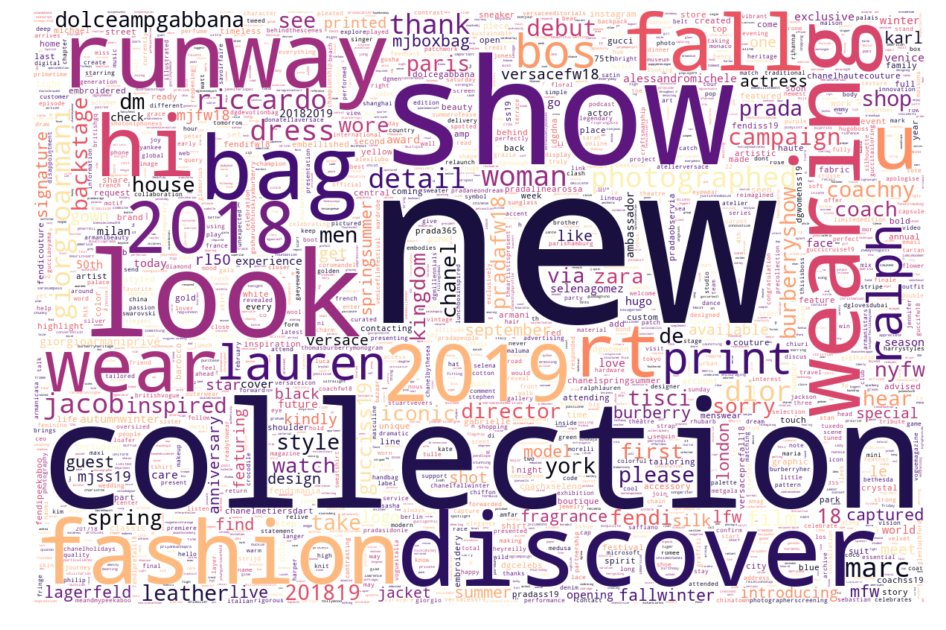

In [36]:
createWcloud(freqs,colormap = 'magma')

The most common words are new, collection, discover, fashion, show and look.

## Vader sentiment

Now I want to import the vadersentiment package to analyse the sentiment associated with each tweet

In [37]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [38]:
analyzer = SentimentIntensityAnalyzer()

I create a dictionary which will be filled with the sentiment of each tweet

In [39]:
tweetSentiment = {}
for tweet in df_brands.tweets:
    vs = analyzer.polarity_scores(tweet) 
    tweetSentiment[tweet] = vs['compound']

Let's create a dataframe from the dictionary

In [41]:
df_sent = pd.DataFrame.from_dict(tweetSentiment, orient='index')

In [42]:
len(df_sent)

2800

In [43]:
df_sent.head()

,0
I copy therefore I am. Every human practice begins with copying. Scenes from a video by Yuri Ancarani of… https://t.co/XxsDoJhtAC,0.0
"DA BANG, who performed at the opening of #TheArtistIsPresent—curated by @maurizio_art—including Wang Jing in a… https://t.co/YpTbtt0FMB",0.0
"Actress #SongZuer in a leather dress from #GucciCruise19, #GucciFlashtrek sneakers, and plush jacket from… https://t.co/2GVgf2VlwW",0.0
"Attending the opening of #TheArtistIsPresent, the exhibit curated by @maurizio_art at the Yuz Museum in Shanghai: M… https://t.co/hBjkMLe92P",0.0
#SakaguchiKentaro in #GucciCruise19 with a sweatshirt printed with the mascot from #ChateauMarmont at the opening o… https://t.co/egVe035bRX,0.0


It's a bit messy, so I reset the index

In [44]:
df_sent.reset_index(drop = True,inplace = True)

I rename the only column we have in this df

In [46]:
df_sent.rename({0: 'Sentiment (number)'}, axis = 1, inplace=True)

In [47]:
df_sent.head()

,Sentiment (number)
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


I add some columns taken from df_brands df

In [50]:
df_sent['Brands'] = np.array(df_brands.name)
df_sent['tweets'] = np.array(df_brands.tweets)
df_sent['len'] = np.array(df_brands.len)

In [51]:
df_sent.head()

,Sentiment (number),Brands,tweets,len
0,0.0,gucci,I copy therefore I am. Every human practice be...,129
1,0.0,gucci,"DA BANG, who performed at the opening of #TheA...",135
2,0.0,gucci,Actress #SongZuer in a leather dress from #Guc...,130
3,0.0,gucci,"Attending the opening of #TheArtistIsPresent, ...",140
4,0.0,gucci,#SakaguchiKentaro in #GucciCruise19 with a swe...,140


I got a new dataframe with some fancy stuff

The following function will allow me to create a new column which will be our label for the ML model

In [52]:
def sent_analysis(x):
    if x < 0:
        return 'Negative'
    elif x == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df_sent['Sentiment'] = df_sent['Sentiment (number)'].apply(lambda x: sent_analysis(x))

This function will create a new column which count the punctuation in each tweet

In [53]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

df_sent['punct%'] = df_sent['tweets'].apply(lambda x: count_punct(x))

In [54]:
df_sent.head()

,Sentiment (number),Brands,tweets,len,Sentiment,punct%
0,0.0,gucci,I copy therefore I am. Every human practice be...,129,Neutral,6.4
1,0.0,gucci,"DA BANG, who performed at the opening of #TheA...",135,Neutral,7.5
2,0.0,gucci,Actress #SongZuer in a leather dress from #Guc...,130,Neutral,8.6
3,0.0,gucci,"Attending the opening of #TheArtistIsPresent, ...",140,Neutral,8.1
4,0.0,gucci,#SakaguchiKentaro in #GucciCruise19 with a swe...,140,Neutral,6.5


## Some Machine Learning

First I import the package to split the dataset in train and in test set

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_sent[['tweets', 'len', 'punct%']], df_sent['Sentiment'], test_size=0.2)

Then, I import the TfidVectorizer in order to create convert the collection of tweets to a matrix of TF-IDF features.

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

Here I apply the TfidVectorizer and we get 2 sparse matrices

In [57]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['tweets'])

tfidf_train = tfidf_vect_fit.transform(X_train['tweets'])
tfidf_test = tfidf_vect_fit.transform(X_test['tweets'])

X_train_vect = pd.concat([X_train[['len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,len,punct%,0,1,2,3,4,5,6,7,...,9815,9816,9817,9818,9819,9820,9821,9822,9823,9824
0,140,6.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,140,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,140,6.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,114,10.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,136,7.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now it's time to apply some Machine Learning stuff

In [58]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time

First I use the random forest algorithm

In [59]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

start = time.time()
rf_model = rf.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='positive', average='weighted')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 3.854 / Predict time: 0.248 ---- Precision: 0.747 / Recall: 0.72 / Accuracy: 0.72


/home/lucads/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1045: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Then I use the GradientBoosting algorithm

In [60]:
gb = GradientBoostingClassifier(n_estimators=150, max_depth=11)

start = time.time()
gb_model = gb.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = gb_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='Positive', average='weighted')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 425.565 / Predict time: 0.103 ---- Precision: 0.793 / Recall: 0.78 / Accuracy: 0.78


/home/lucads/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1045: UserWarning: Note that pos_label (set to 'Positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


We can see that the latter provide a better accuracy but also take much longer as it is computationally heavier.

Thanks for Your attention

# Luca RIZZI